## **深層学習　画像データセットで分類を行う**

# **演習19**

# **STEP0：事前準備**

**コード19-1 Google Driveのマウント**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**コード19-2 zipファイルを解凍する**

In [2]:
!unzip '/content/drive/MyDrive/images_TMDU.zip'

Archive:  /content/drive/MyDrive/images_TMDU.zip
replace __MACOSX/._images? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


**コード19-3 ライブラリ・モジュール・クラスをインポート**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import set_random_seed

# **STEP1：データの用意と前処理**

**コード19-4 zipファイルを解凍する**

In [4]:
list_healthy = [i for i in os.listdir('/content/images/COVID-NORMAL/healthy') if not i.startswith('.')]
list_covid19 = [i for i in os.listdir('/content/images/COVID-NORMAL/covid19') if not i.startswith('.')]

**コード19-5 画像ファイル数の集計**

In [5]:
num_healthy = len(list_healthy)
num_covid19 = len(list_covid19)
num_all = num_healthy + num_covid19
print(num_all)

232


**コード19-6 画像データ格納用numpy配列の作成**

In [6]:
images_temp = np.zeros((num_all,64,64,1),dtype=float)
labels_temp = np.zeros((num_all, 1), dtype=int)
print(images_temp.shape)
print(labels_temp.shape)

(232, 64, 64, 1)
(232, 1)


**コード19-7 画像データの読み込み**

In [7]:
path = '/content/images/COVID-NORMAL'
for i in range(num_healthy):
  file = f'{path}/healthy/{list_healthy[i]}'
  file_img = load_img(file, color_mode='grayscale', target_size = (64,64), interpolation='lanczos')
  images_temp[i]=img_to_array(file_img)/255

**コード19-8 画像の読み込み「list_covid19」**

In [8]:
for i in range(num_covid19):
  file = f'{path}/covid19/{list_covid19[i]}'
  file_img = load_img(file, color_mode='grayscale', target_size = (64,64), interpolation='lanczos')
  images_temp[i + num_healthy] = img_to_array(file_img)/255
  labels_temp[i + num_healthy] = 1

**コード19-9 0から231までの数字の配列をシャッフルして作成**

In [9]:
np.random.seed(0)
num_list = np.arange(num_all)
np.random.shuffle(num_list)
print(num_list)

[219 144 231 188 136 130 198 169  90 157 137 124 110 116 170   8  71 212
 111   5 180  44 171  96 161 202  37  76 179 213  12 125  83 208 210 106
 135  18  15  55   7 149 190 153 203  97  89  74  33 122  63 207 150 123
 194 143  16 108  64  45 182  75  22 104 129   4 101  61 109  52  66  26
 139 205  40  13   3  92  24  30 126  60  56 146 107  19 173 183  54 187
  80  51 160 159 118  86 166 145 176 152  41  14  27  50 209  20 154  46
 158 227 134 162  62 156   2  59 155 215  43 181  10 223  73 222 225 112
 206 168  98  93 138 221 113   0  94  95  69  49  48  85 229 141  23  78
 100 131 186 230   6  68  84 121 218 199 196 191 226  91 201  11 119 102
  35  57  65   1 120 184  42 105 132 200  17  38 133  53 164 178 128  34
  28 114 163 151  31 189 127 185 204  32 167 142 214 147  29 177  99  82
 228 175  79 197 115 148 224  72  77  25 165  81 217 174 220  39 193  58
 140  88 216  70  87  36  21 211   9 103 195  67 192 117  47 172]


**コード19-10 images_tempとlabels_tempの配列をシャッフルする**

In [10]:
x_train = images_temp[num_list]
y_train = labels_temp[num_list]

# **STEP2：モデルの選択**

**コード19-11 ランダムシード値の設定**

In [11]:
set_random_seed(0)
tf.config.experimental.enable_op_determinism()

**コード19-12 モデルの設計**

In [12]:
model = Sequential()
model.add(Flatten(input_shape=(64,64,1)))
model.add(Dense(512, activation ='relu'))
model.add(Dense(256, activation ='relu'))
model.add(Dense(128, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics =['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 512)               2097664   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2262017 (8.63 MB)
Trainable params: 2262017 (8.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **STEP3：データを入れて学習**

**コード19-13 学習**

In [13]:
result = model.fit(x_train, y_train,
                   batch_size=32,
                   epochs =100,
                   validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 1s 79ms/step - loss: 1.3871 - accuracy: 0.5081 - val_loss: 0.6793 - val_accuracy: 0.6170
Epoch 2/100
6/6 [==============================] - 0s 33ms/step - loss: 0.6532 - accuracy: 0.6108 - val_loss: 0.6963 - val_accuracy: 0.5532
Epoch 3/100
6/6 [==============================] - 0s 38ms/step - loss: 0.6503 - accuracy: 0.6757 - val_loss: 0.8512 - val_accuracy: 0.5532
Epoch 4/100
6/6 [==============================] - 0s 34ms/step - loss: 0.8632 - accuracy: 0.5568 - val_loss: 0.9742 - val_accuracy: 0.5532
Epoch 5/100
6/6 [==============================] - 0s 35ms/step - loss: 0.8319 - accuracy: 0.5459 - val_loss: 0.6527 - val_accuracy: 0.6170
Epoch 6/100
6/6 [==============================] - 0s 34ms/step - loss: 0.6341 - accuracy: 0.6108 - val_loss: 0.7180 - val_accuracy: 0.5745
Epoch 7/100
6/6 [==============================] - 0s 20ms/step - loss: 0.6465 - accuracy: 0.6216 - val_loss: 0.5853 - val_accuracy: 0.6809
Epoch 8/100
6/6 [===

# **STEP4：モデルの評価**

**コード19-14 正解率の図示**

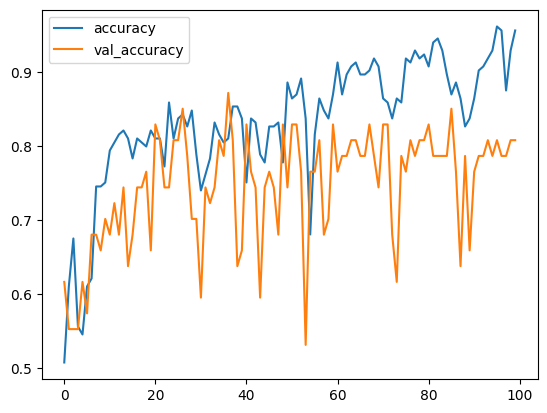

In [14]:
plt.plot(result.history['accuracy'], label = 'accuracy')
plt.plot(result.history['val_accuracy'], label ='val_accuracy')
plt.legend()
plt.show()

**コード19-15 損失の図示**

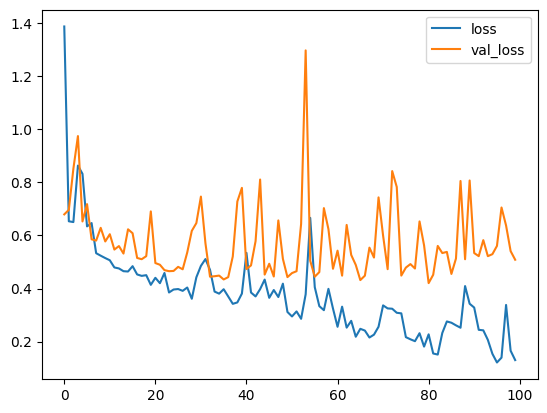

In [15]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# **過学習を予測するため、別のモデルを作成**

# **STEP2：学習モデルの選択(model_d)**

**コード19-16 ドロップアウトを入れたモデルの設計**

In [16]:
model_d = Sequential()
model_d.add(Flatten(input_shape=(64,64,1)))
model_d.add(Dense(512, activation = 'relu'))
model_d.add(Dropout(0.5))
model_d.add(Dense(256, activation = 'relu'))
model_d.add(Dropout(0.5))
model_d.add(Dense(128, activation = 'relu'))
model_d.add(Dense(1, activation = 'sigmoid'))
model_d.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])
model_d.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               2097664   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 1)                

# **STEP3：データを入れて学習**

**コード19-17 学習**

In [17]:
result_d = model_d.fit(x_train, y_train,
                       batch_size = 32,
                       epochs = 100,
                       validation_split = 0.2)

Epoch 1/100
6/6 [==============================] - 1s 49ms/step - loss: 1.2907 - accuracy: 0.5243 - val_loss: 0.6514 - val_accuracy: 0.5745
Epoch 2/100
6/6 [==============================] - 0s 20ms/step - loss: 1.2117 - accuracy: 0.5243 - val_loss: 0.6584 - val_accuracy: 0.5532
Epoch 3/100
6/6 [==============================] - 0s 23ms/step - loss: 1.0968 - accuracy: 0.5459 - val_loss: 0.7976 - val_accuracy: 0.5532
Epoch 4/100
6/6 [==============================] - 0s 20ms/step - loss: 1.1013 - accuracy: 0.5027 - val_loss: 0.6774 - val_accuracy: 0.5532
Epoch 5/100
6/6 [==============================] - 0s 21ms/step - loss: 1.1567 - accuracy: 0.5405 - val_loss: 0.6633 - val_accuracy: 0.5532
Epoch 6/100
6/6 [==============================] - 0s 23ms/step - loss: 0.8716 - accuracy: 0.5784 - val_loss: 0.7331 - val_accuracy: 0.4468
Epoch 7/100
6/6 [==============================] - 0s 26ms/step - loss: 0.8451 - accuracy: 0.5784 - val_loss: 0.6794 - val_accuracy: 0.5532
Epoch 8/100
6/6 [===

# **STEP4：モデルの評価**

**コード19-18 正解率の図示**

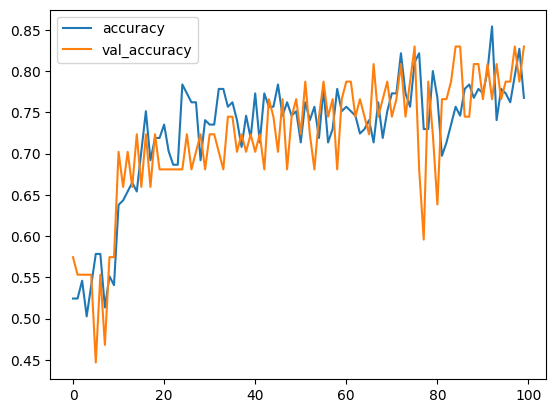

In [18]:
plt.plot(result_d.history['accuracy'], label = 'accuracy')
plt.plot(result_d.history['val_accuracy'], label ='val_accuracy')
plt.legend()
plt.show()

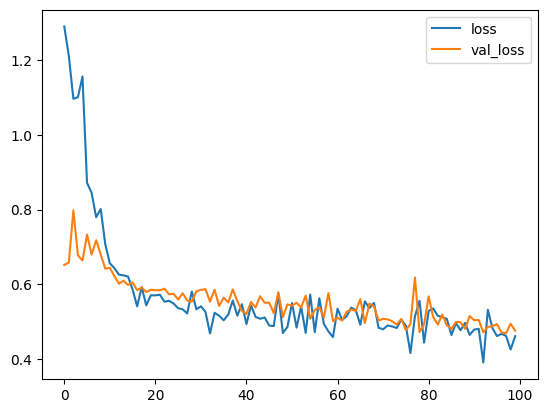

In [19]:
plt.plot(result_d.history['loss'], label='loss')
plt.plot(result_d.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# **STEP5：予測**

**コード19-19 別の画像データ(covid19肺炎のX線写真)を読み込む**

In [20]:
img1 = img_to_array(load_img('/content/images/covid.jpg',
                             color_mode='grayscale',
                             target_size=(64,64)))/255
check = np.zeros((1,64,64,1))
check[0] = img1

**コード19-20 画像をモデルに当てはめて予測を行う**

In [21]:
print(model_d.predict(check))

1/1 [==============================] - 0s 76ms/step
[[0.93901634]]


**コード19-21 画像データ（健康な肺のX線写真)を読み込む**

In [22]:
img2 = img_to_array(load_img('/content/images/NORMAL.jpg',
                             color_mode='grayscale',
                             target_size=(64,64)))/255
check = np.zeros((1,64,64,1))
check[0] = img2

**コード19-22 画像をモデルに当てはめて予測を行う**

In [23]:
print(model_d.predict(check))

1/1 [==============================] - 0s 20ms/step
[[0.13710847]]
